In [7]:
import pandas as pd
import plotly.express as px
import numpy as np
pd.set_option("mode.chained_assignment", None)
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np

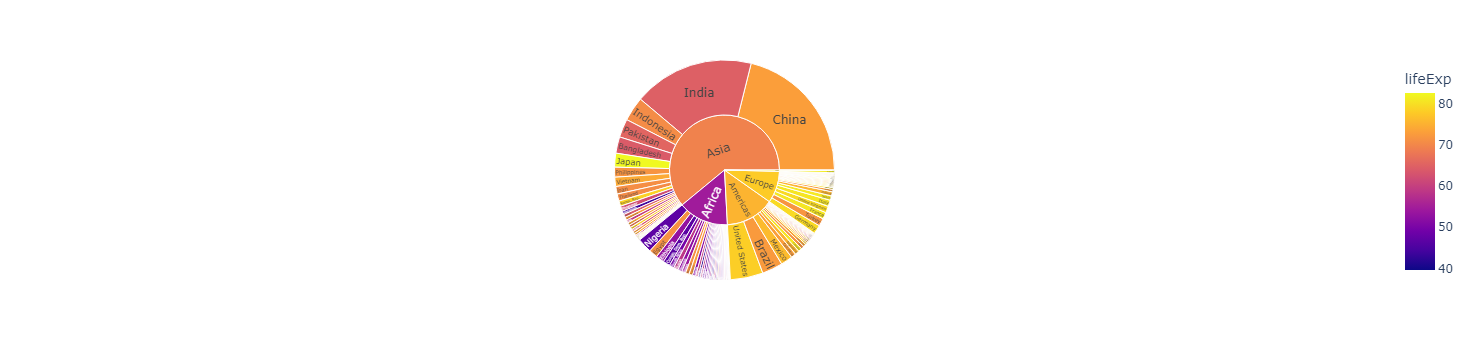

In [8]:
import plotly.express as px

df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'])
fig.show()

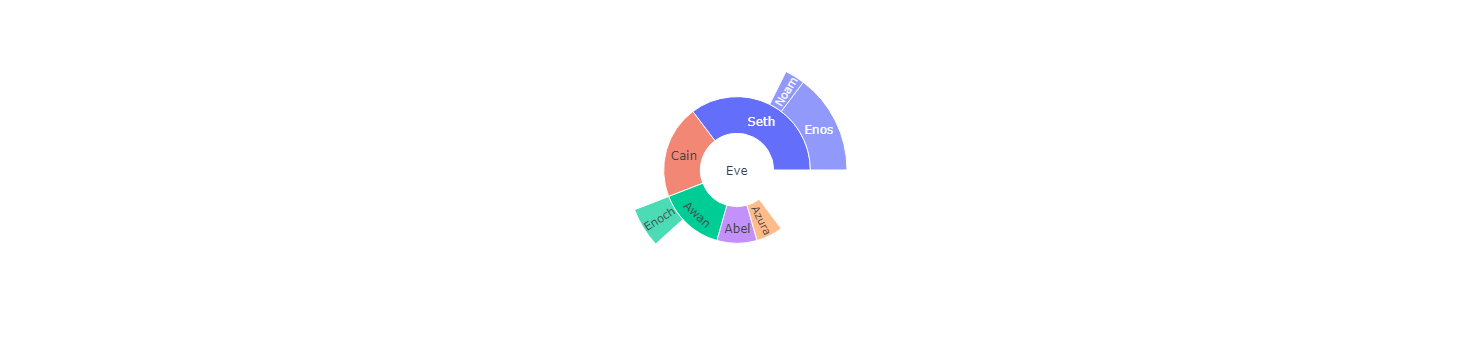

In [11]:
import plotly.express as px
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[0, 14, 12, 10, 2, 6, 6, 4, 4])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()

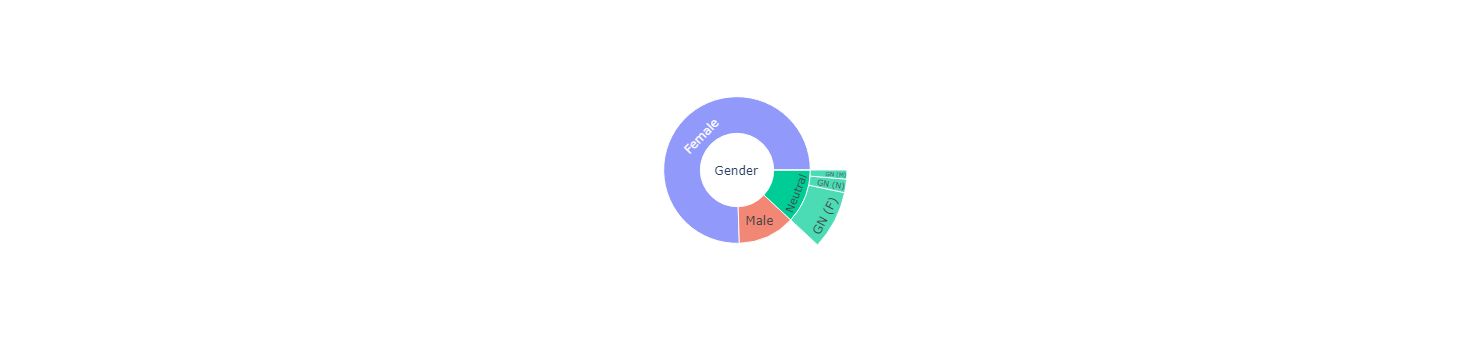

In [7]:
import pandas as pd
import plotly.express as px
import numpy as np
pd.set_option("mode.chained_assignment", None)
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline
%run ~/Data/Core.ipynb

Process_GA()
TGL = pd.read_csv('/home/jovyan/Data/Gender.csv')
fig = px.sunburst(TGL,
                  names='Gender',
                  parents='Parent',
                  values='Count'
                 )
fig.show()

In [3]:
import pandas as pd
import plotly.express as px
import numpy as np
pd.set_option("mode.chained_assignment", None)
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline
%run ~/Data/Core.ipynb

Process_Race()

In [4]:
import matplotlib.pyplot as plt
from IPython.display import display
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [42]:
TRL = pd.read_csv('/home/jovyan/Data/Race.csv')


Cor_Sub_Race = []
Cor_Race = []
Cor_Count = []

#TRL.at[x1,'Tag2']
for x1, y1 in TRL.iterrows():
    cont = TRL.at[x1,'Count']
    if cont > 0:
        SubR = TRL.at[x1,'Sub-Race']
        if not isinstance(SubR, str):
            #continue
            SubR = TRL.at[x1,'Source']+"."+TRL.at[x1,'Race']

        Cor_Sub_Race.append(SubR)
        Cor_Race.append(TRL.at[x1,'Race'])
        Cor_Count.append(cont)


myset = set(Cor_Race)
Cor_Race_Uni = list(myset)
Fin_Sub_Race = ["Race"]
Fin_Race = [""]
Fin_Count = [0]

for RU in Cor_Race_Uni:
    Fin_Sub_Race.append(RU)
    Fin_Race.append("Race")
    Fin_Count.append(0)


Cor = {'SubRace': Cor_Sub_Race,
       'Race': Cor_Race,       
       'Count': Cor_Count
      }


for RU in Cor_Sub_Race:
    Fin_Sub_Race.append(RU)
for RU in Cor_Race:
    Fin_Race.append(RU)
for RU in Cor_Count:
    Fin_Count.append(RU)



Tem = {'SubRace': Fin_Sub_Race,
       'Race': Fin_Race,       
       'Count': Fin_Count
      }

df = pd.DataFrame(Tem)
df = df.iloc[::-1]


#for x1, y1 in df.iterrows():
#    for x2, y2 in df.iterrows():
#        if df.at[x1,'Race'] == df.at[x2,'SubRace']:
#            df.at[x2,'Count'] += df.at[x1,'Count']

#for x1, y1 in df.iterrows():
#    if df.at[x1,'Race'] == 'Race' and df.at[x1,'SubRace'] == '':
#        for x2, y2 in df.iterrows():
#            if df.at[x2,'Race'] ==  'Race':
#                df.at[x1,'Count'] += df.at[x2,'Count']
            
            
            
df = df.iloc[::-1]
df.to_csv('/home/jovyan/Data/Race_Burst.csv', index=False) #<<<<<<<
df

SubRace      Race  Count
0                    Race                0
1          Custom Lineage      Race      0
2                  Goblin      Race      0
3               Warforged      Race      0
4                Vedalken      Race      0
..                    ...       ...    ...
106                  Rage   Kitsune      1
107  Basils Brews.Domovoi   Domovoi      1
108       Sisalik.Sisalik   Sisalik      1
109          TEB.Deepling  Deepling      1
110          HGtV.Selkies   Selkies      1

[111 rows x 3 columns]

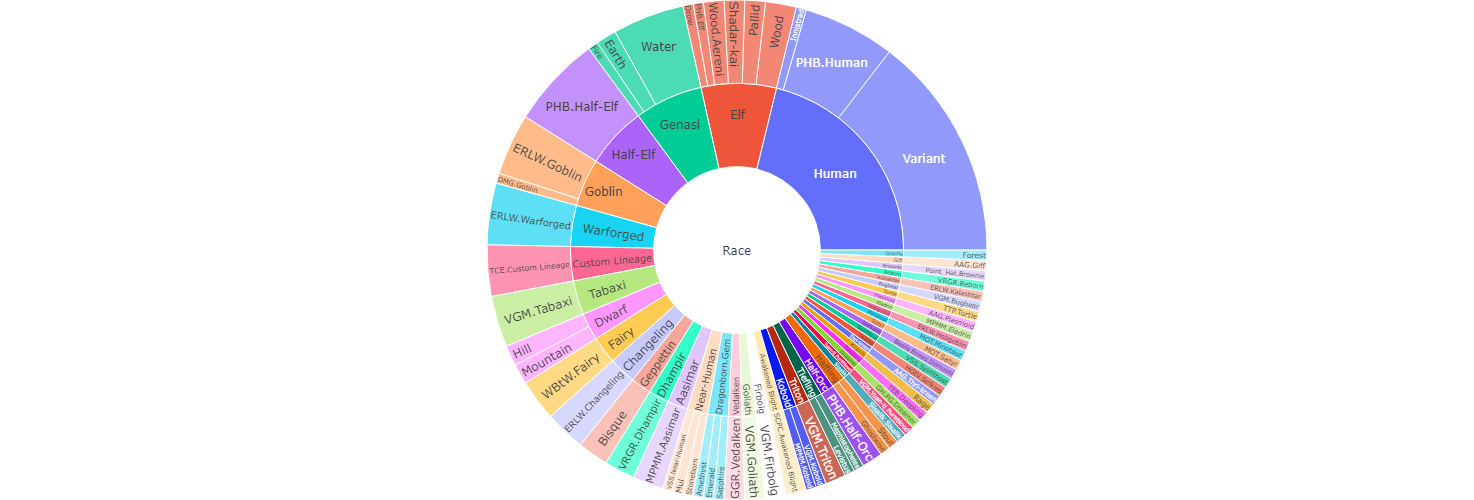

In [43]:
TGL = pd.read_csv('/home/jovyan/Data/Race_Burst.csv')
fig = px.sunburst(TGL,
                  names='SubRace',
                  parents='Race',
                  values='Count'
                 )
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.update_yaxes(tickformat="80%")
fig.update_layout(height=500)
fig.show()

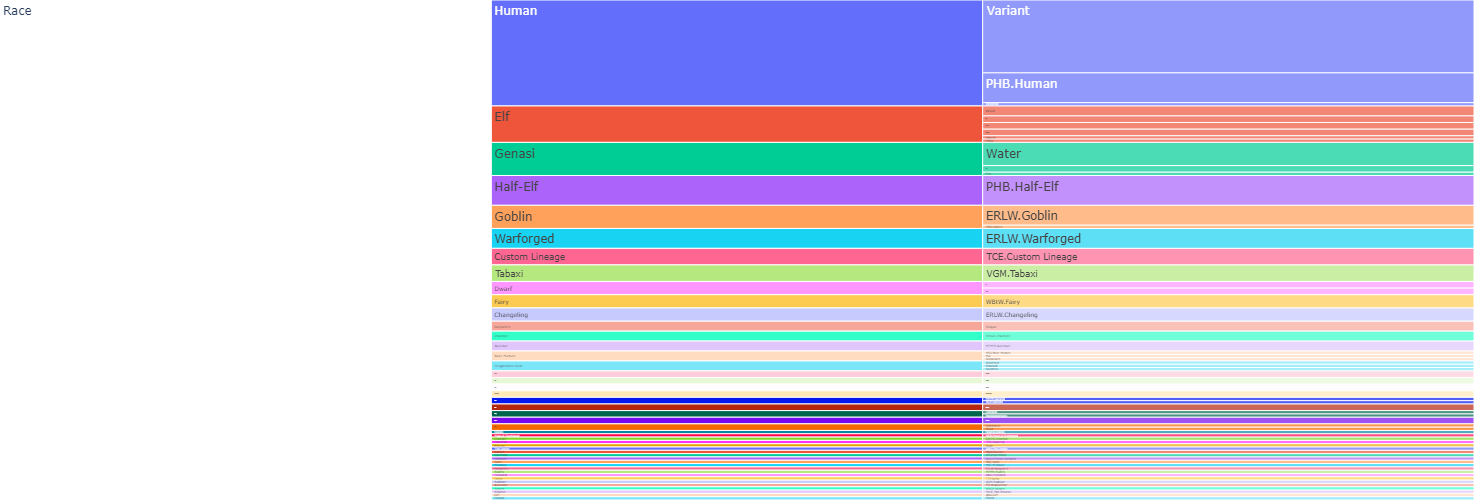

In [44]:
TGL = pd.read_csv('/home/jovyan/Data/Race_Burst.csv')
fig = px.icicle(TGL,
                  names='SubRace',
                  parents='Race',
                  values='Count'
                 )
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.update_yaxes(tickformat="80%")
fig.update_layout(height=500)
fig.show()